In [345]:
250306

250306

In [346]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Linear Regression

In this lab, we are going to continue to explore linear regression and introduce the concept of regularisation, specifically, Ridge Regression, Lasso and Elastic Net.



### Load the housing dataset

Using pandas, load the following dataset (available on eclass):

**housing.csv:** this dataset is constituted by 506 points in 14 dimensions. Each point represents a house in the Boston area, and the 14 attributes that you find orderly in each column are the following:
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per \$10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in $1000's

This dataset is normally associated with 2 regression tasks: predicting `NOX` (in which the nitrous oxide level is to be predicted); and predicting price `MEDV` (in which the median value of a home is to be predicted).

This dataset was also pre-processed and scaled.

In [347]:
housing_df = pd.read_csv('housing.csv')
housing_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.165514,0.067815,0.0,0.273696,0.455845,0.495675,0.238389,0.000000,0.188979,0.252496,0.693147,0.085884,3.218876
1,0.000236,0.000000,0.242302,0.0,0.159428,0.436962,0.578128,0.299335,0.042560,0.099811,0.440312,0.693147,0.186040,3.117950
2,0.000236,0.000000,0.242302,0.0,0.159428,0.527320,0.469617,0.299335,0.042560,0.099811,0.440312,0.688003,0.061533,3.575151
3,0.000293,0.000000,0.063050,0.0,0.139941,0.505947,0.365901,0.370559,0.083382,0.064658,0.500130,0.690281,0.032843,3.538057
4,0.000705,0.000000,0.063050,0.0,0.139941,0.523014,0.424170,0.370559,0.083382,0.064658,0.500130,0.693147,0.094708,3.616309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.000000,0.420455,0.0,0.327021,0.458029,0.519848,0.115711,0.000000,0.151967,0.638489,0.686938,0.198109,3.152736
502,0.000438,0.000000,0.420455,0.0,0.327021,0.398993,0.565337,0.100111,0.000000,0.151967,0.638489,0.693147,0.184664,3.072693
503,0.000612,0.000000,0.420455,0.0,0.327021,0.503402,0.645695,0.090189,0.000000,0.151967,0.638489,0.693147,0.102459,3.214868
504,0.001160,0.000000,0.420455,0.0,0.327021,0.482097,0.636473,0.108419,0.000000,0.151967,0.638489,0.688788,0.123165,3.135494


In [348]:
X = housing_df.values[:,:-1]
y = housing_df['MEDV']

### Let's split the data into training, validation and testing. 80% training, 10% validation and 10% testing.
suggestion: use random_state=12

In [349]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, train_size=.8, random_state=12)
X_validation_lasso, X_test, y_validation, y_test = train_test_split(X_to_split, y_to_split, train_size=.5, random_state=12)

X_train = np.insert(X_train, 0, 1, axis=1)
X_test = np.insert(X_test, 0, 1, axis=1)
X_validation_lasso = np.insert(X_validation_lasso, 0, 1, axis=1)

y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)
y_validation = y_validation.to_numpy().reshape(-1, 1)

# Part I - Ridge Regression

Now you will write code that implements Ridge Regression using the closed form from the slides.

In [350]:
def ridge_regression(dataset: np.ndarray, target: np.ndarray, lambd: np.ndarray, insert_ones_column: bool = True) -> np.ndarray:
    """Function to generate to found the weight vectors of a linear regression using Ridge Regression

    Args:
        dataset (np.ndarray): Dataset to be used
        target (np.ndarray): Target values we want to obtain
        lambd (np.ndarray): Regularization coefficient

    Returns:
        np.ndarray: Weights array
    """
    if insert_ones_column:
        dataset = np.insert(dataset, 0, 1, axis=1)
    w = np.linalg.inv(lambd * np.identity(dataset.shape[1]) + dataset.T @ dataset) @ dataset.T @ target
    return w

Test different values of $\lambda$ on the validation set and choose the one that gives the best RMSE.

Then plot the RMSE of the validation and training sets at different values of $\lambda$. 

Try: 20 points in the interval $\lambda \in [0,2]$


Your plot should like the one below.

In [351]:
def plot_rmse_comparision_trainXvalidation_curve(
    alphas: float | np.float64,
    train_rmses: np.ndarray | list | tuple,
    validation_rmses: np.ndarray | list | tuple,
    title: str,
    x_label: str = "ALPHA",
):
    """Function made for plotting the RMSE error in function of the alpha for each set (Training and Validation)

    Args:
        alphas (float | np.float64): The alpha values
        train_rmses (np.ndarray | list | tuple): Traning RMSE values in function of the alphas
        validation_rmses (np.ndarray | list | tuple): Validation RMSE values in function of the alphas
        title (str): Title of the Graphic
        x_label (str, optional): Label to assign the ALPHA axis. Defaults to "ALPHA".
    """
    # Ploting and comparing the curves
    plt.title(title)
    plt.plot(alphas, train_rmses, 'o--', linewidth=2, label='Training Data RMSE curve')
    plt.plot(alphas, validation_rmses, 'x--', linewidth=2, label='Validation Data RMSE curve')

    plt.ylabel('RMSE')
    plt.xlabel(x_label)

    plt.grid()

    plt.legend()
    plt.show()

============== BEST LAMBDA ==============
0.21052631578947367
=== ERROR GENERATED BY THE BEST LAMBDA ===
BEST VALIDATION ERROR: 0.20867119761751987


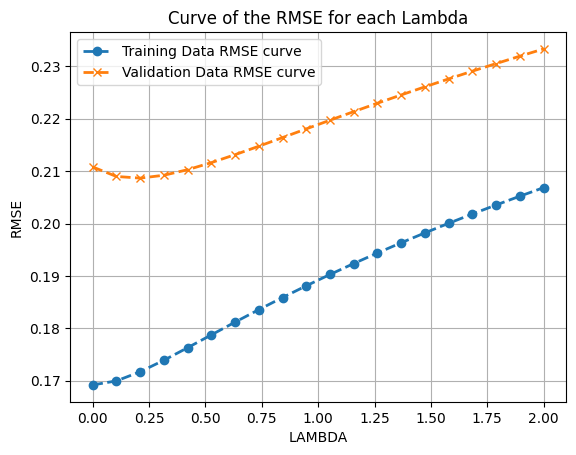

In [352]:
lambdas = np.linspace(0, 2, 20)  # 20 points for lambda (All between 0 and 2)
train_rmses = []
validation_rmses = []

# Calculando os erros para vários valores de LAMBDA
for lamb in lambdas:
    w = ridge_regression(X_train, y_train, lamb, False)  # Getting the weights for that specific LAMBDA
    w = w.reshape(-1, 1)

    rmse_train = float(np.sqrt(np.mean((y_train - X_train @ w)**2)))  # Calculating the RMSE
    rmse_validation = float(np.sqrt(np.mean((y_validation - X_validation_lasso @ w)**2)))

    train_rmses.append(rmse_train)
    validation_rmses.append(rmse_validation)

best_validation_rmse = min(validation_rmses)  # Getting the best RMSE value
best_train_rmse = min(train_rmses)

# 
# PERSONAL NOTE:
# When you're choosing the best lambda, you calculate the weights, compare the error obtained in the training
# dataset and the validation dataset, and, in the end, when you're about to choose the lambda, you'll choose
# the one that gived you the minimum error in the VALIDATION dataset!
# #

best_lambda_value = lambdas[validation_rmses.index(best_validation_rmse)]  # Getting the best Lambda value

# ============= FAZENDO A PLOTAGEM DOS DADOS =============
print("============== BEST LAMBDA ==============")
print(best_lambda_value)
print("=== ERROR GENERATED BY THE BEST LAMBDA ===")
print(f"BEST VALIDATION ERROR: {best_validation_rmse}")

plot_rmse_comparision_trainXvalidation_curve(
    lambdas,
    train_rmses,
    validation_rmses,
    "Curve of the RMSE for each Lambda",
    'LAMBDA'
)


Now, after selecting the best $\lambda$ based on the plot above, report the RMSE of the testing set.

Don't forget to use the whole training set (train+validation) to train a model with the best value of $\lambda$.

In [353]:
X_train_and_validation = np.vstack((X_train, X_validation_lasso))
y_train_and_validation = np.vstack((y_train, y_validation))

w = ridge_regression(X_train_and_validation, y_train_and_validation, best_lambda_value, False)
test_rmse = float(np.sqrt(np.mean((y_test - X_test @ w)**2)))

print("============== TRAINING DATA RMSE ==============")
print(test_rmse)

============== TRAINING DATA RMSE ==============
0.16943772896509235


# Part II - Lasso

Now you will implement Lasso regression, but using the scikit-learn implementation to learn the weights.

You will still use the same training/validation/testing folds as in Part I

The l1 term is controlled by the alpha parameter in the scikit-learn implementation of Lasso.

### The goal here is to again find a good value of alpha for the RMSE in the validation set. 
Experiment with some different values, generate the same plot as Part I, and report the RMSE of testing set after selecting the best alpha from the validation set.

In [354]:
# Generating the data again
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, train_size=.8, random_state=12)
X_validation, X_test, y_validation, y_test = train_test_split(X_to_split, y_to_split, train_size=.5, random_state=12)

============== BEST LAMBDA ==============
0.0005263158368421053
=== ERROR GENERATED BY THE BEST LAMBDA ===
BEST VALIDATION ERROR: 0.21021173200677917


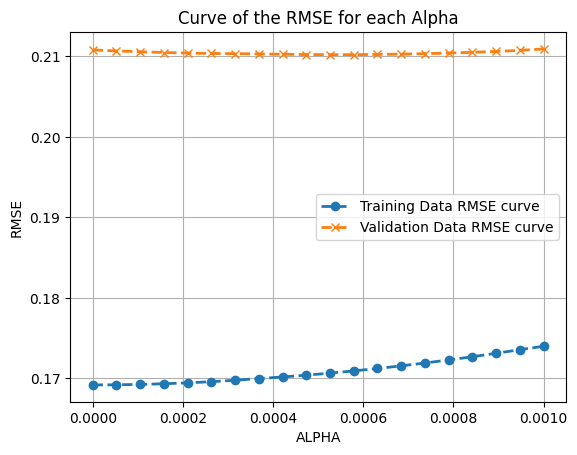

In [355]:
alphas = np.linspace(1e-10, 1e-3, 20)

# Creating the list errors for plot comparision
RMSEs_training = []
RMSEs_validation = []

# Checking values of alpha that I made
for alpha in alphas:
    lasso_regression = Lasso(alpha=alpha).fit(X_train, y_train)  # Creating the Lasso model
    
    # Getting the prediction on the Training dataset
    y_predict_train = lasso_regression.predict(X_train)
    # Getting the error on the Validation dataset
    y_predict_validation = lasso_regression.predict(X_validation)

    # Getting the error on the Training dataset
    training_rmse = np.sqrt(np.mean((y_train - y_predict_train)**2))
    # Getting the error on the Validation dataset
    validation_rmse = np.sqrt(np.mean((y_validation - y_predict_validation)**2))

    RMSEs_training.append(training_rmse)
    RMSEs_validation.append(validation_rmse)

best_rmse = min(RMSEs_validation)
best_alpha = alphas[RMSEs_validation.index(best_rmse)]

print("============== BEST LAMBDA ==============")
print(best_alpha)
print("=== ERROR GENERATED BY THE BEST LAMBDA ===")
print(f"BEST VALIDATION ERROR: {best_rmse}")
plot_rmse_comparision_trainXvalidation_curve(
    alphas,
    RMSEs_training,
    RMSEs_validation,
    "Curve of the RMSE for each Alpha"
)

# Part III Elastic Net

Now let's combine both ridge and lasso and implement Elastic Net Regression, again we'll use the sklearn implementation.

Following the guidelines from Part II, implement Elastic Net using the sklearn implementation ElasticNet()

I strongly advise you to read the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

For simplicity here, let's apply the best $\lambda$ of Part I and the best alpha from Part II and train an Elastic Net model and report the testing set RMSE.

In [356]:
elastic_regression = ElasticNet(alpha=best_alpha, l1_ratio=best_lambda_value)
elastic_regression.fit(X_train, y_train)

y_predict_test = elastic_regression.predict(X_test)

rmse = float(np.sqrt(np.mean(y_test - y_predict_test)**2))

print(rmse)

0.030216106323317976
